# <center>Autocorrelation and Partial autocorrelation function from scratch</center>

## Import libraies

In [55]:
import numpy as np
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf
from matplotlib import pyplot

## Mean of the population

In [56]:
def mean(population):
    shape = np.shape(population)
    length_of_population = shape[0]
    if length_of_population == 0:
        mean = 0
    else:
        mean = np.sum(population)/length_of_population
    return mean

## Variance of the population

In [57]:
def variance(population):
    shape = np.shape(population)
    length_of_population = shape[0]
    if length_of_population == 0:
        variance = 0
    else:
        deviation_from_mean = population - mean(population)
        squares_of_devaiation = deviation_from_mean ** 2
        variance = np.sum(squares_of_devaiation)/length_of_population
    return variance

## Standard devaition of the population

In [58]:
def standard_deviation(population):
    var = variance(population)
    sd = np.sqrt(var)
    return sd

## Pearson correlation coefficient

In [59]:
def pearson_correlation_coef(A, B):
    shape_A = np.shape(A)
    shape_B = np.shape(B)
    if shape_A[0] != shape_B[0]:
        print("Error in correlation function. The length of two lists are not same.")
    else:
        num = np.sum((A - mean(A)) * (B - mean(B)))
        den = standard_deviation(A) * standard_deviation(B) * shape_A[0]
        correlation_coef = num/den
        return correlation_coef

## Plot autocorrelation fucntion
- correlation_coef  is a helper function for finding autocorrelation.

In [60]:
def correlation_coef(A, B, mean_population, var_population, length):
    shape_A = np.shape(A)
    shape_B = np.shape(B)
    if shape_A[0] != shape_B[0]:
        print("Error in correlation function. The length of two lists are not same.")
    else:
        num = np.sum((A - mean_population) * (B - mean_population))
        den = var_population * length
        correlation_coef = num/den
        return correlation_coef


def plot_autocorrelation_function(population):
    autocorrelation_coefs = []
    length = np.shape(population)[0]
    mean_population = mean(population)
    var_population = variance(population)
    for lag in range(0, length):
        A = population[lag: ]
        B = population[:length-lag]
        corr_coef = correlation_coef(A, B, mean_population, var_population, length)
        autocorrelation_coefs.append(corr_coef)
    print(autocorrelation_coefs)

In [49]:
a = [1,5,10,3,2,7]



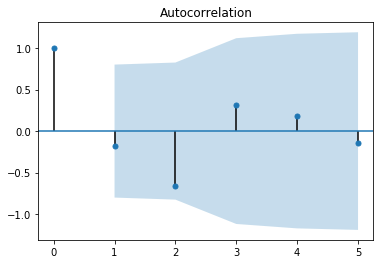

In [50]:
plot_acf(a)
pyplot.show()

In [51]:
plot_autocorrelation_function(a)

[1.0000000000000002, -0.17635658914728683, -0.6666666666666669, 0.308139534883721, 0.184108527131783, -0.1492248062015504]


In [24]:
pearson_correlation_coef([1,5,10,3,2,7], [0,0,0,1,5,10])

0.12056070554260305

In [38]:
import numpy
def acf(series):
    n = len(series)
    data = numpy.asarray(series)
    mean = numpy.mean(data)
    c0 = numpy.sum((data - mean) ** 2) / float(n)

    def r(h):
        acf_lag = ((data[:n - h] - mean) * (data[h:] - mean)).sum() / float(n) / c0
        print(round(acf_lag, 3))
        return round(acf_lag, 3)
    x = numpy.arange(n) # Avoiding lag 0 calculation
    acf_coeffs = map(r, x)
    return acf_coeffs

In [39]:
acf(a)